In [ ]:
### 1. Pandas

In [ ]:
1. Read the provided CSV file ‘data.csv’

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
dataset = pd.read_csv('data.csv')
df = pd.DataFrame(dataset)

In [ ]:
2. Show the basic statistical description about the data.

In [40]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
3.Check if the data has null values.
- a. Replace the null values with the mean


In [41]:
nullVal = pd.DataFrame(df[df.isna().any(axis=1)])
print("Rows that has null values:")
print(nullVal)

Rows that has null values:
     Duration  Pulse  Maxpulse  Calories
17         45     90       112       NaN
27         60    103       132       NaN
91         45    107       137       NaN
118        60    105       125       NaN
141        60     97       127       NaN


In [42]:
nullValInx = list(nullVal.index.values)

df = df.fillna(round(df.mean(),1)) #replace the null values with the respective mean value of the column

In [43]:
updated_val = pd.DataFrame(df,index=nullValInx)
print("After Update:")
updated_val

After Update:


,Duration,Pulse,Maxpulse,Calories
17,45,90,112,375.8
27,60,103,132,375.8
91,45,107,137,375.8
118,60,105,125,375.8
141,60,97,127,375.8


In [ ]:
4. Select at least two columns and aggregate the data using: min, max, count, mean.

In [44]:
df.agg({'Pulse' : ['max', 'min', 'count', 'mean'], 'Calories' : ['max', 'min', 'count', 'mean']})

,Pulse,Calories
max,159.000000,1860.400000
min,80.000000,50.300000
count,169.000000,169.000000
mean,107.461538,375.790533


In [ ]:
5. Filter the dataframe to select the rows with calories values between 500 and 1000

In [45]:
df_greater_500 = df[df['Calories']>=500] #filter rows with calories above 500
df_filter = df_greater_500[df_greater_500["Calories"]<=1000] #from the above result, filter the rows with calories below 1000
df_filter

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [ ]:
6. Filter the dataframe to select the rows with calories values > 500 and pulse <100.

In [46]:
df_great_500 = df[df['Calories']>500]
df_filter = df_great_500[df_great_500["Pulse"]<100]
df_filter

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [ ]:
7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”

In [47]:
df_modified = df[["Duration","Pulse","Calories"]]
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
8. Delete the “Maxpulse” column from the main df dataframe

In [48]:
del df["Maxpulse"]
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
9. Convert the datatype of Calories column to int datatype.

In [49]:
df["Calories"] = df["Calories"].astype(int)
df

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


In [ ]:
10. Using pandas create a scatter plot for the two columns (Duration and Calories)

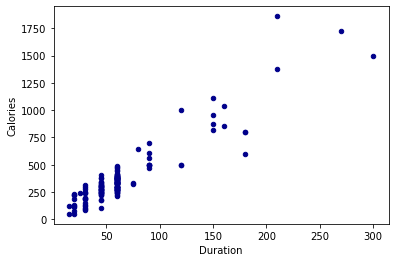

In [50]:
df.plot.scatter(x='Duration', y='Calories', c='DarkBlue')
plt.show()

In [ ]:
### 2. Scikit-learn

In [ ]:
1. Implement Naïve Bayes method using scikit-learnlibrary.

In [ ]:
- a. Use the glass dataset available in Link also provided in your assignment.

In [51]:
import numpy as np
import random as rnd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# reading the dataset file 
df = pd.read_csv('glass.csv')

In [53]:
X = df.drop(['Type'], axis=1)
Y = df["Type"]

#splitting the dataset into training set and testing set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25,random_state = 0)

In [ ]:
2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [54]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_Train,Y_Train)

# Predicting the Test set result
Y_Pred = gnb.predict(X_Test)

# evaluating the model
print("Gaussian Naive Bayers Accuracy is:",round(accuracy_score(Y_Test,Y_Pred) * 100,2))
print("\nClassification Report:\n\n",metrics.classification_report(Y_Test,Y_Pred,zero_division=0))

Gaussian Naive Bayers Accuracy is: 46.3

Classification Report:

               precision    recall  f1-score   support

           1       0.32      0.64      0.43        14
           2       0.45      0.21      0.29        24
           3       0.50      0.40      0.44         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         7

    accuracy                           0.46        54
   macro avg       0.49      0.54      0.49        54
weighted avg       0.49      0.46      0.44        54



In [ ]:
1. Implement linear SVM method using scikit library
- a. Use the glass dataset available in Link also provided in your assignment.
- b. Use train_test_split to create training and testing part.
2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [55]:
# SVM model
svc = SVC(kernel='linear')
svc.fit(X_Train, Y_Train)

# Predicting the Test set result
Y_pred = svc.predict(X_Test)

# evaluating the model
print("SVM accuracy is:", round(accuracy_score(Y_Test,Y_pred) * 100, 2))
print("\nClassification Report:\n\n",metrics.classification_report(Y_Test,Y_pred,zero_division=0))

SVM accuracy is: 55.56

Classification Report:

               precision    recall  f1-score   support

           1       0.43      0.86      0.57        14
           2       0.60      0.38      0.46        24
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         7

    accuracy                           0.56        54
   macro avg       0.45      0.54      0.47        54
weighted avg       0.53      0.56      0.51        54

